In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset = pd.read_csv('weather.csv')

# Exploring the dataset
print("Dataset shape:", dataset.shape)
print("Dataset head:\n", dataset.head())

Dataset shape: (366, 22)
Dataset head:
    MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.

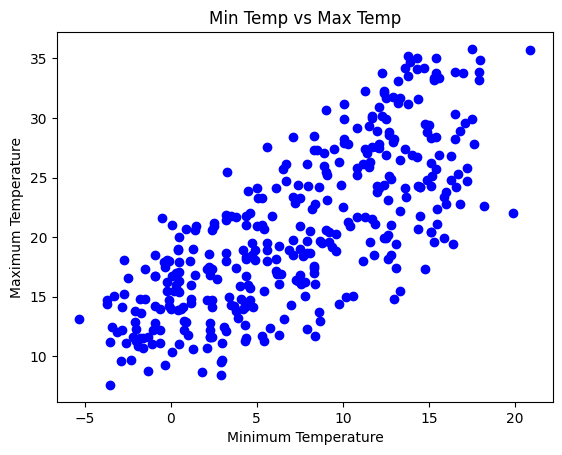

In [3]:
# Visualizing the relationship between min and max temperature
plt.scatter(dataset['MinTemp'], dataset['MaxTemp'], color='blue')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Min Temp vs Max Temp')
plt.show()

In [7]:
# Chọn các biến đặc trưng và biến mục tiêu
X = dataset[['MinTemp']]  # Đặc trưng (nhiệt độ tối thiểu)
y = dataset['MaxTemp']    # Mục tiêu (nhiệt độ tối đa)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
linear_regressor = LinearRegression()  # khởi tạo mô hình
linear_regressor.fit(X_train, y_train)  # huấn luyện mô hình

# Kiểm tra các tham số của mô hình
print("Intercept (Hệ số chặn):", linear_regressor.intercept_)
print("Coefficient (Hệ số góc):", linear_regressor.coef_)


Intercept (Hệ số chặn): 14.56202411394353
Coefficient (Hệ số góc): [0.81953755]


     Actual  Predicted
106    25.2  23.413030
259    11.5  13.086857
45     21.1  27.264856
26     22.2  25.461874
78     20.4  26.937041
347    26.1  20.052926
90     34.9  29.313700
311    16.7  13.824440
239    14.3  17.430406
6      18.2  19.561203


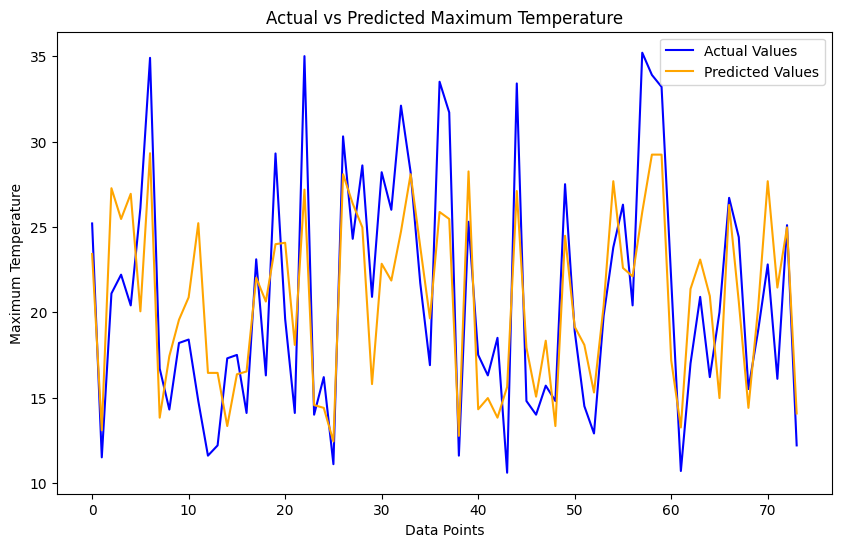

In [8]:
# Making predictions on the test set
# Dự đoán trên tập kiểm tra
y_pred = linear_regressor.predict(X_test)

# Comparing actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

# Plotting actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, color='blue', label='Actual Values')
plt.plot(y_pred, color='orange', label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Maximum Temperature')
plt.legend()
plt.title('Actual vs Predicted Maximum Temperature')
plt.show()

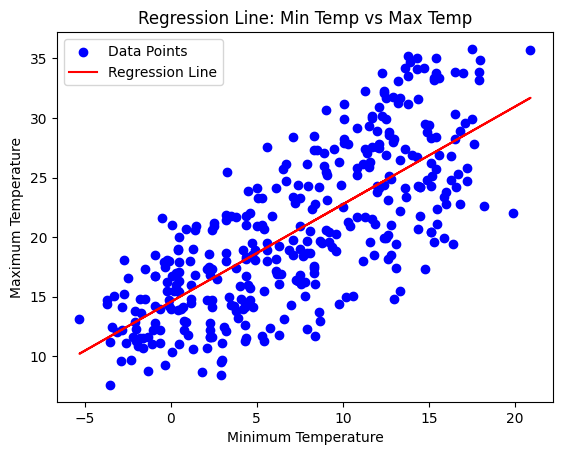

In [10]:
# Plotting the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X,linear_regressor.predict(X), color='red', label='Regression Line')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.legend()
plt.title('Regression Line: Min Temp vs Max Temp')
plt.show()

In [11]:
# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096
